<h6>Importing Required Libraries</h6>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<h2>Exploratory Data Analysis</h2>

In [11]:
train.drop(['PassengerId'],axis=1,inplace=True)
test.drop(['PassengerId'],axis=1,inplace=True)

In [12]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

<p>Both training and test data contains null values. </p>

Let's Create a temporary dataframe which has both training and testing data for data analysis

In [14]:
df = train.append(test, ignore_index=True)
df['familySize'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familySize
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [15]:
len(df)

1309

<Figure size 1440x720 with 0 Axes>

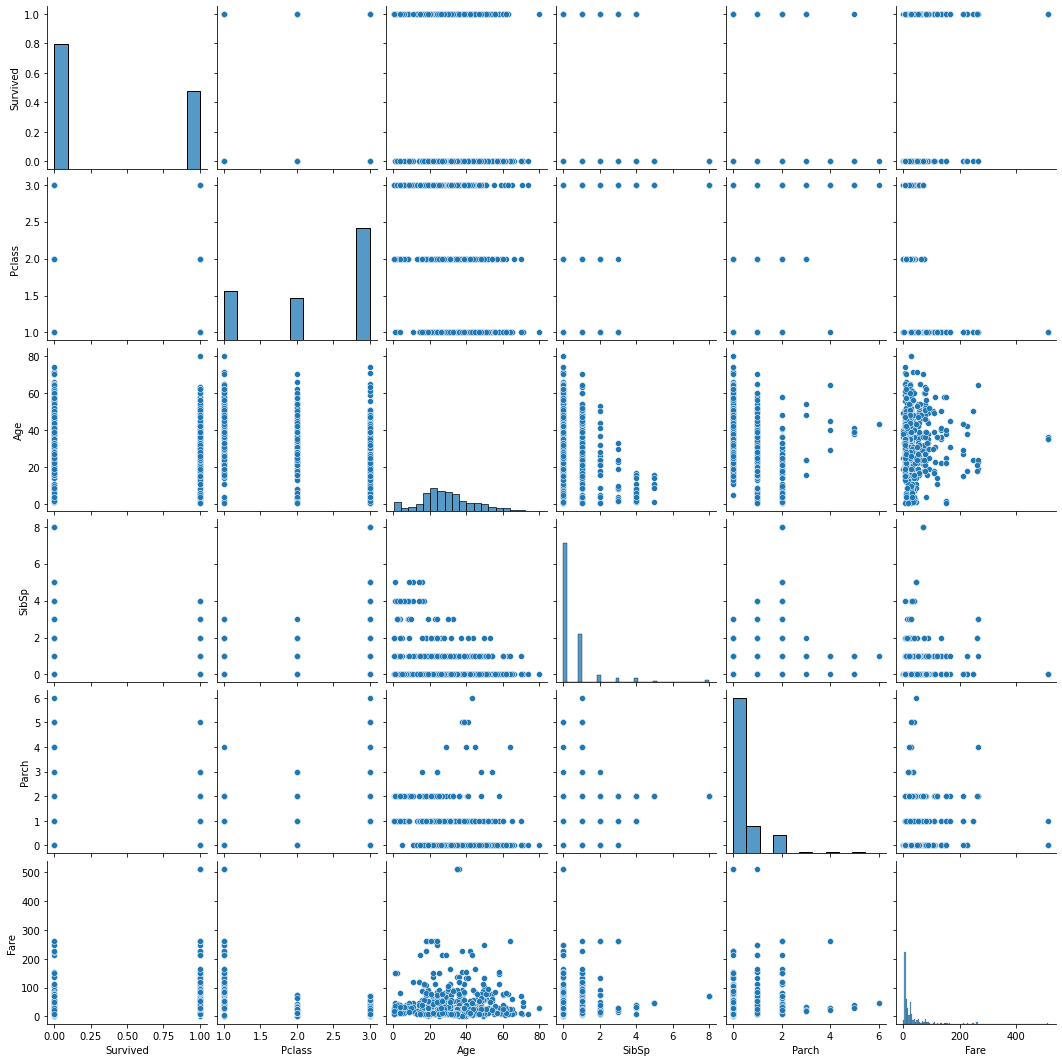

In [16]:
plt.figure(figsize=(20,10))
sns.pairplot(train)

In [17]:
import plotly.express as px

z = train.corr()
fig = px.imshow(z, text_auto=True, aspect="auto")
fig.show()


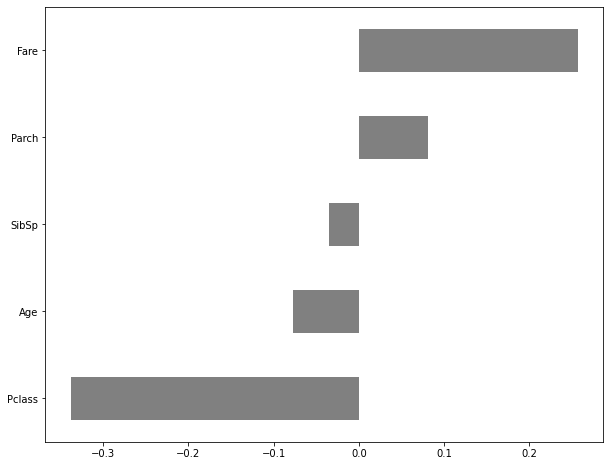

In [18]:
plt.figure(figsize=(10,8))
train.corr()['Survived'].drop('Survived').sort_values().plot.barh(color='grey')

In [19]:
# OUTLIERS


iqr_factor = [1.5, 2]
list1, list2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'Outliers for {factor} IQR :')
    print('-------------------------------------')
    for col in train.select_dtypes(['int64', 'float64']):
    
        IQR = train[col].quantile(0.75) - train[col].quantile(0.25)
        lower_lim = train[col].quantile(0.25) - factor*IQR
        upper_lim = train[col].quantile(0.75) + factor*IQR
    
        cond = train[(train[col] < lower_lim) | (train[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 1.5:
            list1.append(train[(train[col] < lower_lim) | (train[col] > upper_lim)].index.tolist())
        elif cond > 0 and factor == 2:
            list2.append(train[(train[col] < lower_lim) | (train[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<30} : ', cond); count += cond
    print(f'\nTOTAL OUTLIERS FOR {factor} IQR : {count}')
    print('\n\n')

Outliers for 1.5 IQR :
-------------------------------------
Age                            :  11
SibSp                          :  46
Parch                          :  213
Fare                           :  116

TOTAL OUTLIERS FOR 1.5 IQR : 386



Outliers for 2 IQR :
-------------------------------------
Age                            :  2
SibSp                          :  30
Parch                          :  213
Fare                           :  92

TOTAL OUTLIERS FOR 2 IQR : 337





<Figure size 576x432 with 0 Axes>

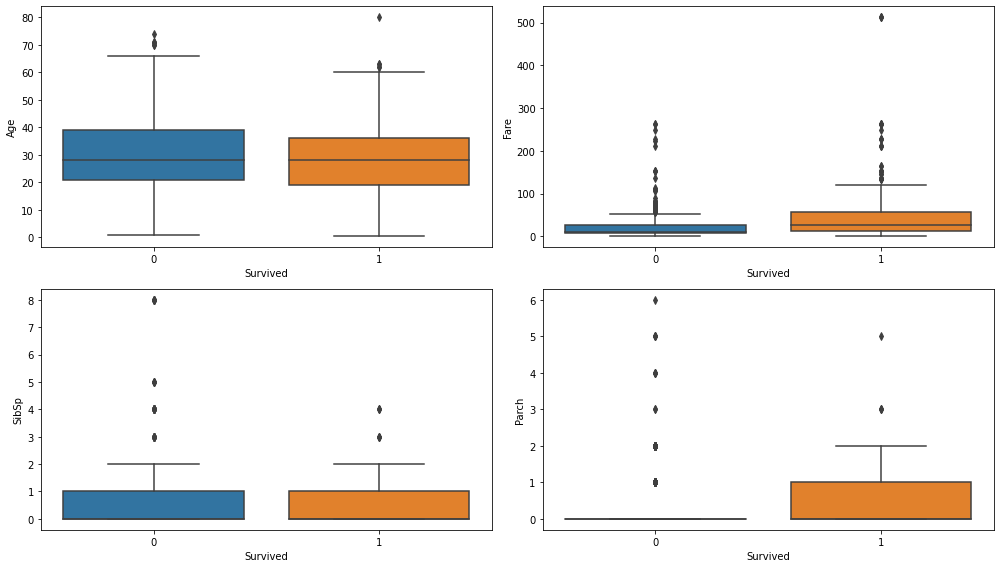

In [20]:
plt.figure(figsize=(8,6))

fig, ax = plt.subplots(2,2, figsize=(14,8))

sns.boxplot(data=train, x='Survived', y='Age', ax=ax[0,0])

sns.boxplot(data=train, x='Survived', y='Fare', ax=ax[0,1])

sns.boxplot(data=train, x='Survived', y='SibSp', ax=ax[1,0])

sns.boxplot(data=train, x='Survived', y='Parch', ax=ax[1,1])


plt.tight_layout();

<h4>Now let's Review Each Feature</h4>

In [21]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<h6>PClass<h6>

Text(0, 0.5, 'Number of Passengers')

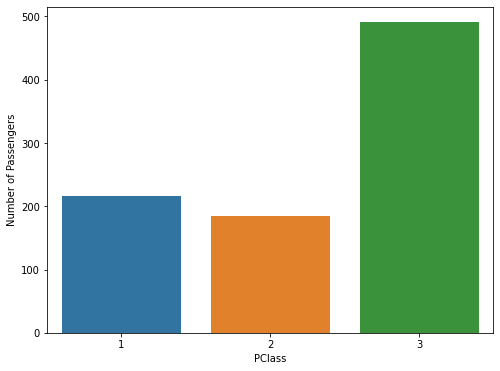

In [22]:
plt.figure(figsize=(8,6))

t = sns.barplot(x = train['Pclass'].value_counts().index,
            y = train['Pclass'].value_counts().values,
            data = train
            )

plt.xlabel("PClass")
plt.ylabel("Number of Passengers")



In [23]:
fig = px.pie(train, values=train['Pclass'].value_counts().values, names=train['Pclass'].value_counts().index, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

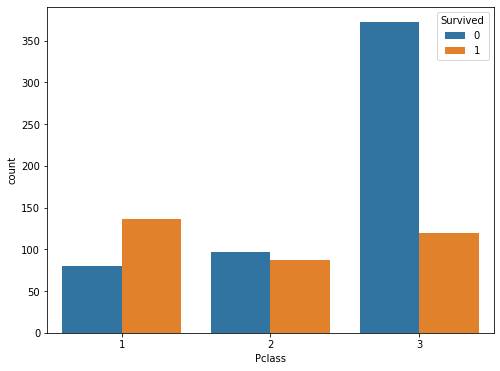

In [24]:
plt.figure(figsize=(8,6))

z = sns.countplot(data=train, x='Pclass', hue='Survived')


In [25]:
train.Pclass.isnull().sum()

0

In [26]:
test.Pclass.isnull().sum()

0

<h6>Sex</h6>

Text(0, 0.5, 'Number of Passengers')

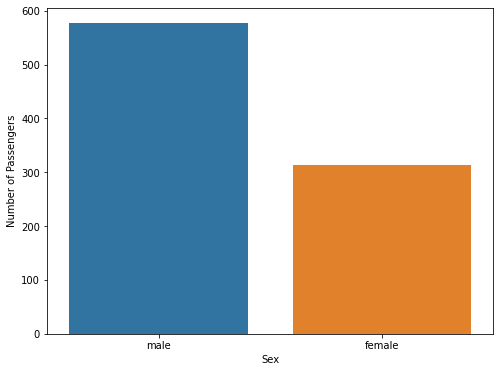

In [27]:
plt.figure(figsize=(8,6))

t = sns.barplot(x = train['Sex'].value_counts().index,
            y = train['Sex'].value_counts().values,
            data = train
            )

plt.xlabel("Sex")
plt.ylabel("Number of Passengers")


In [28]:
fig = px.pie(train, values=train['Sex'].value_counts().values, names=train['Sex'].value_counts().index, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

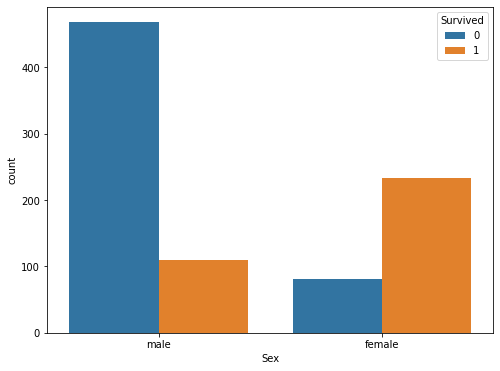

In [29]:
plt.figure(figsize=(8,6))

z = sns.countplot(data=train, x='Sex', hue='Survived')


In [30]:
len(df)

1309

In [31]:
train.Sex.isnull().sum()

0

In [32]:
test.Sex.isnull().sum()

0

<p>Ordinal Encoding of feature Sex and dropping Sex Column</p>

In [33]:
train['Gender'] = [0 if x =='female' else 1 for x in train['Sex']]
test['Gender'] = [0 if x =='female' else 1 for x in test['Sex']]

df['Gender'] = [0 if x =='female' else 1 for x in df['Sex']]

In [34]:
train.drop(['Sex'],axis=1,inplace=True)
test.drop(['Sex'],axis=1,inplace=True)
df.drop(['Sex'],axis=1,inplace=True)

In [35]:
df.head(2)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familySize,Gender
0,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0


<h6>SibSp - Parch</h6>

<p>
SibSp: Number of siblings and spouses of the passenger aboard<br/>
Parch: Number of parents and children of the passenger aboard
</p>


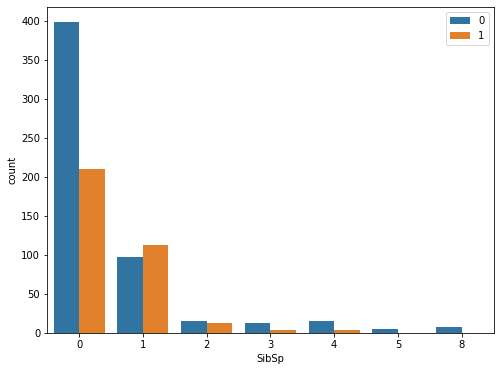

In [36]:
plt.figure(figsize=(8,6))

z = sns.countplot(data=train, x='SibSp', hue='Survived')
plt.legend(loc='upper right')

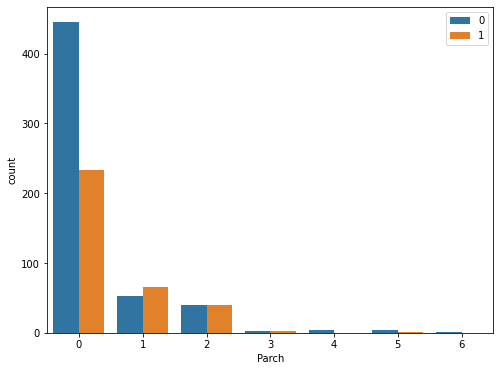

In [37]:
plt.figure(figsize=(8,6))

z = sns.countplot(data=train, x='Parch', hue='Survived')
plt.legend(loc='upper right')

In [38]:
df.isnull().sum()

Survived       418
Pclass           0
Name             0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin         1014
Embarked         2
familySize       0
Gender           0
dtype: int64

<h6>Embarked</h6>

In [39]:
df.dtypes

Survived      float64
Pclass          int64
Name           object
Age           float64
SibSp           int64
Parch           int64
Ticket         object
Fare          float64
Cabin          object
Embarked       object
familySize      int64
Gender          int64
dtype: object

Text(0, 0.5, 'Number of Passengers')

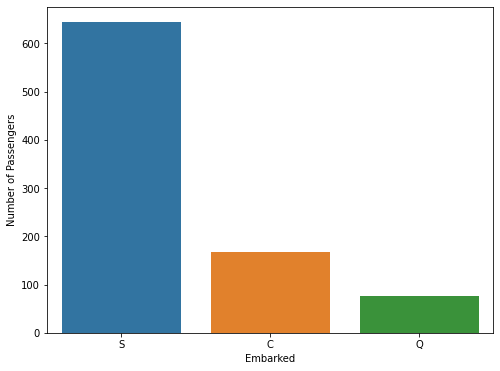

In [40]:
plt.figure(figsize=(8,6))

t = sns.barplot(x = train['Embarked'].value_counts().index,
            y = train['Embarked'].value_counts().values,
            data = train
            )

plt.xlabel("Embarked")
plt.ylabel("Number of Passengers")


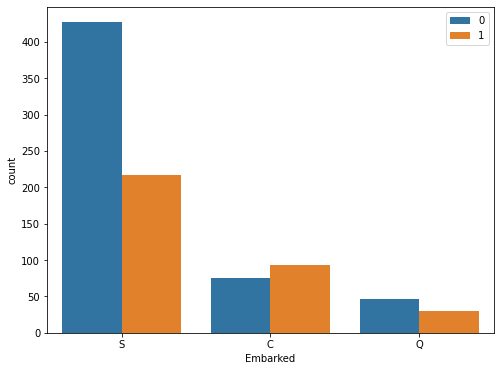

In [41]:
plt.figure(figsize=(8,6))

z = sns.countplot(data=train, x='Embarked', hue='Survived')
plt.legend(loc='upper right')

In [42]:
(train.Embarked.isnull().sum(),test.Embarked.isnull().sum(),df.Embarked.isnull().sum())

(2, 0, 2)

In [43]:
train.Embarked.fillna(train.Embarked.mode()[0],inplace=True)
test.Embarked.fillna(test.Embarked.mode()[0],inplace=True)
df = train.append(test, ignore_index=True)

In [44]:
df['Embarked_Q'] = [1 if x=='Q' else 0 for x in df['Embarked']]
df['Embarked_S'] = [1 if x=='S' else 0 for x in df['Embarked']]
df['Embarked_C'] = [1 if x=='C' else 0 for x in df['Embarked']]

train['Embarked_Q'] = [1 if x=='Q' else 0 for x in train['Embarked']]
train['Embarked_S'] = [1 if x=='S' else 0 for x in train['Embarked']]
train['Embarked_C'] = [1 if x=='C' else 0 for x in train['Embarked']]

test['Embarked_Q'] = [1 if x=='Q' else 0 for x in test['Embarked']]
test['Embarked_S'] = [1 if x=='S' else 0 for x in test['Embarked']]
test['Embarked_C'] = [1 if x=='C' else 0 for x in test['Embarked']]


In [45]:
df.drop(['Embarked'],axis=1,inplace=True)
test.drop(['Embarked'],axis=1,inplace=True)
train.drop(['Embarked'],axis=1,inplace=True)

In [46]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [47]:
df.dtypes

Survived      float64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Gender          int64
Embarked_Q      int64
Embarked_S      int64
Embarked_C      int64
dtype: object

In [48]:
df.isnull().sum()

Survived      418
Pclass          0
Age           263
SibSp           0
Parch           0
Fare            1
Gender          0
Embarked_Q      0
Embarked_S      0
Embarked_C      0
dtype: int64

In [49]:
train.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Gender          0
Embarked_Q      0
Embarked_S      0
Embarked_C      0
dtype: int64

<h6>Fare</h6>


In [50]:
df.isnull().sum()

Survived      418
Pclass          0
Age           263
SibSp           0
Parch           0
Fare            1
Gender          0
Embarked_Q      0
Embarked_S      0
Embarked_C      0
dtype: int64

In [51]:
len(df)

1309

In [52]:
test.Fare.isnull().sum()

1

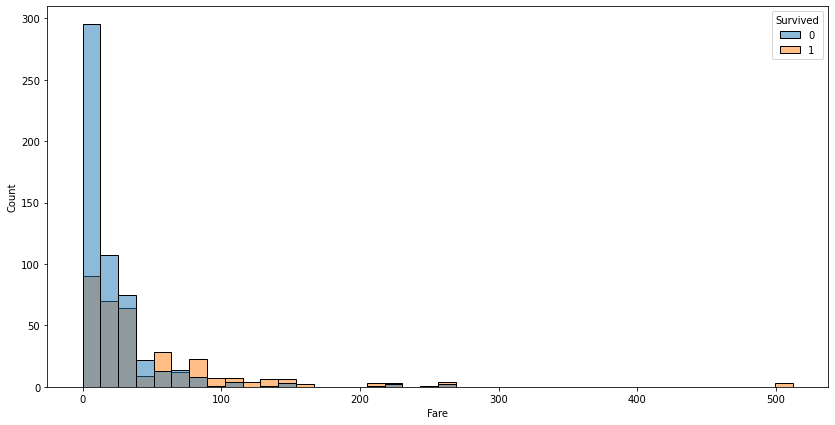

In [53]:
plt.figure(figsize=(14,7))
sns.histplot(data=train, x='Fare', hue='Survived', bins=40)

<h6>Age</h6>

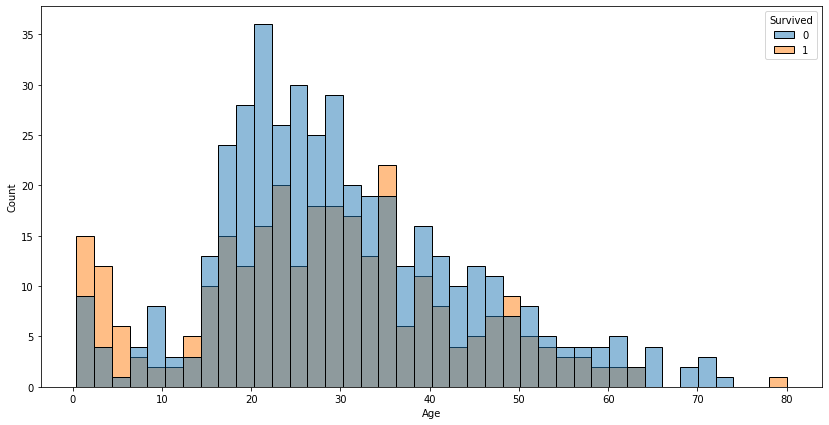

In [54]:
plt.figure(figsize=(14,7))
sns.histplot(data=train, x='Age', hue='Survived', bins=40)

In [55]:
train.Age.isnull().sum()

177

In [56]:
test.Age.isnull().sum()

86

<h5>Using KNN Imputer to fill null values in Age and Fare Columns</h5>

In [57]:
y = df.pop('Survived')

In [58]:
y

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: Survived, Length: 1309, dtype: float64

In [59]:
df.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender', 'Embarked_Q',
       'Embarked_S', 'Embarked_C'],
      dtype='object')

In [60]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_ = imputer.fit_transform(df)

In [61]:
df_

array([[ 3. , 22. ,  1. , ...,  0. ,  1. ,  0. ],
       [ 1. , 38. ,  1. , ...,  0. ,  0. ,  1. ],
       [ 3. , 26. ,  0. , ...,  0. ,  1. ,  0. ],
       ...,
       [ 3. , 38.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 27.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 3. , 14. ,  1. , ...,  0. ,  0. ,  1. ]])

In [62]:
df_ = pd.DataFrame(data=df_,columns= list(df.columns))

In [63]:
df_.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Gender        0
Embarked_Q    0
Embarked_S    0
Embarked_C    0
dtype: int64

<h4>splitting train and test data</h4>

In [64]:
df = df_.copy()

In [65]:
y_ = list(y)

In [66]:
df['Survived'] = y_

In [67]:
df.dtypes

Pclass        float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Gender        float64
Embarked_Q    float64
Embarked_S    float64
Embarked_C    float64
Survived      float64
dtype: object

In [68]:
train = df[~df.Survived.isnull()]

In [69]:
train.dtypes

Pclass        float64
Age           float64
SibSp         float64
Parch         float64
Fare          float64
Gender        float64
Embarked_Q    float64
Embarked_S    float64
Embarked_C    float64
Survived      float64
dtype: object

In [70]:
test= df[df.Survived.isnull()]

In [71]:
test.isnull().sum()

Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Gender          0
Embarked_Q      0
Embarked_S      0
Embarked_C      0
Survived      418
dtype: int64

In [72]:
train.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Gender        0
Embarked_Q    0
Embarked_S    0
Embarked_C    0
Survived      0
dtype: int64

In [73]:
y_train = train.pop('Survived')
y_test = test.pop('Survived')

In [74]:
X_train = train.copy()
X_test = test.copy()

In [75]:
test_ = pd.read_csv("/content/drive/MyDrive/test.csv")

<h2>Model Building</h2>

In [76]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score,cross_validate,GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,precision_recall_curve,plot_precision_recall_curve

In [77]:
def eval_metric(model, X_train, y_train):
    
    y_train_pred = model.predict(X_train)
   
    print("Train_Set")
    print(f'Score on train dataset is {model.score(X_train,y_train)}')
    # print(confusion_matrix(y_train, y_train_pred))

    X_train_train,y_train_train,X_test_train,y_test_train = train_test_split(X_train,y_train,test_size=0.25,random_state=0)

    cf_matrix = confusion_matrix(y_train,y_train_pred)

    sns.heatmap(cf_matrix,annot=True,cmap='Blues')
    print(classification_report(y_train, y_train_pred))

<h3>Logistic Regression Model</h3>

Train_Set
Score on train dataset is 0.7934904601571269
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       549
         1.0       0.72      0.76      0.74       342

    accuracy                           0.79       891
   macro avg       0.78      0.79      0.78       891
weighted avg       0.80      0.79      0.79       891




Survived Counts in test dataset
0    234
1    184
Name: Survived, dtype: int64





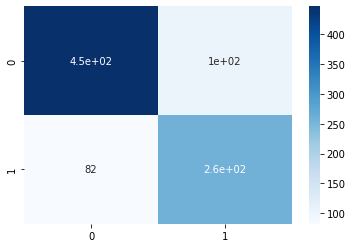

In [78]:
from sklearn.linear_model import LogisticRegression


# log_reg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000,random_state=42).fit(X_train, y_train)
log_reg = Pipeline(steps=[
      ('clf', LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000,random_state=42))
])

log_reg.fit(X_train,y_train)
eval_metric(log_reg,X_train,y_train)

pred = log_reg.predict(X_test)

ans = dict()

ans['PassengerId'] = list(test_.PassengerId)


lst = list()

for i in list(pred):
  lst.append(int(i))


ans['Survived'] = lst

ans_df = pd.DataFrame(ans)

print("\n\n")

print("Survived Counts in test dataset")
print(ans_df.Survived.value_counts())
print("\n\n")
ans_df.to_csv('Titanic_Predicted_LogisticRegression.csv',index=False)

<h3>Support Vector Classification</h3>

<p>We have scale the data for Support Vector Classifier</p>

In [79]:
X_train_ = X_train.copy()
X_test_ = X_test.copy()

In [80]:
scaler = MinMaxScaler()
scaler.fit(X_train_)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

Train_Set
Score on train dataset is 0.8473625140291807
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.88       549
         1.0       0.89      0.68      0.77       342

    accuracy                           0.85       891
   macro avg       0.86      0.82      0.83       891
weighted avg       0.85      0.85      0.84       891




Survived Counts in test dataset
0    280
1    138
Name: Survived, dtype: int64





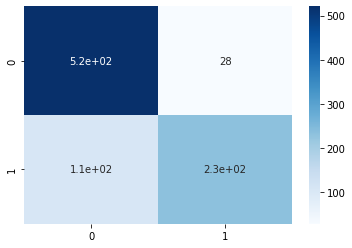

In [81]:
from sklearn.svm import SVC


SVC_C_100 = Pipeline(steps=[
      ('clf', SVC(C=100))
])

SVC_C_100.fit(X_train_scaled,y_train)

eval_metric(SVC_C_100,X_train_scaled,y_train)

pred = SVC_C_100.predict(X_test_scaled)

ans = dict()

ans['PassengerId'] = list(test_.PassengerId)


lst = list()

for i in list(pred):
  lst.append(int(i))


ans['Survived'] = lst

ans_df = pd.DataFrame(ans)

print("\n\n")

print("Survived Counts in test dataset")
print(ans_df.Survived.value_counts())
print("\n\n")
ans_df.to_csv('Titanic_Predicted_SVC_C_100.csv',index=False)

Train_Set
Score on train dataset is 0.8428731762065096
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88       549
         1.0       0.89      0.67      0.77       342

    accuracy                           0.84       891
   macro avg       0.86      0.81      0.82       891
weighted avg       0.85      0.84      0.84       891




Survived Counts in test dataset
0    285
1    133
Name: Survived, dtype: int64





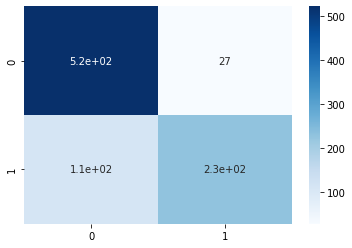

In [82]:
from sklearn.svm import SVC


SVC_C_63 = Pipeline(steps=[
      ('clf', SVC(C=63))
])

SVC_C_63.fit(X_train_scaled,y_train)

eval_metric(SVC_C_63,X_train_scaled,y_train)

pred = SVC_C_63.predict(X_test_scaled)

ans = dict()

ans['PassengerId'] = list(test_.PassengerId)


lst = list()

for i in list(pred):
  lst.append(int(i))


ans['Survived'] = lst

ans_df = pd.DataFrame(ans)

print("\n\n")

print("Survived Counts in test dataset")
print(ans_df.Survived.value_counts())
print("\n\n")
ans_df.to_csv('Titanic_Predicted_SVC_C_63.csv',index=False)

<p>Using Standard Scaler</p>

In [83]:
scaler = StandardScaler()
scaler.fit(X_train_)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train_Set
Score on train dataset is 0.8754208754208754
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91       549
         1.0       0.94      0.73      0.82       342

    accuracy                           0.88       891
   macro avg       0.89      0.85      0.86       891
weighted avg       0.88      0.88      0.87       891




Survived Counts in test dataset
0    287
1    131
Name: Survived, dtype: int64





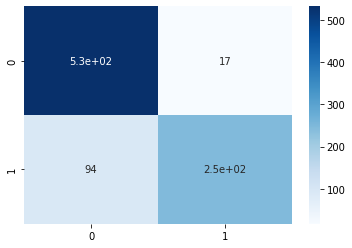

In [84]:
from sklearn.svm import SVC


SVC_C_100 = Pipeline(steps=[
      ('clf', SVC(C=100))
])

SVC_C_100.fit(X_train_scaled,y_train)

eval_metric(SVC_C_100,X_train_scaled,y_train)

pred = SVC_C_100.predict(X_test_scaled)

ans = dict()

ans['PassengerId'] = list(test_.PassengerId)


lst = list()

for i in list(pred):
  lst.append(int(i))


ans['Survived'] = lst

ans_df = pd.DataFrame(ans)

print("\n\n")

print("Survived Counts in test dataset")
print(ans_df.Survived.value_counts())
print("\n\n")
ans_df.to_csv('Titanic_Predicted_SVC_C_100.csv',index=False)

<h3>Decision Tree Classifier</h3>

Train_Set
Score on train dataset is 0.8888888888888888
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       549
         1.0       0.91      0.78      0.84       342

    accuracy                           0.89       891
   macro avg       0.90      0.87      0.88       891
weighted avg       0.89      0.89      0.89       891




Survived Counts in test dataset
0    276
1    142
Name: Survived, dtype: int64





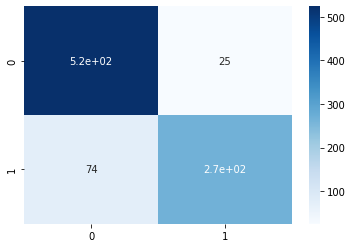

In [85]:
from sklearn.tree import DecisionTreeClassifier


DTC = Pipeline(steps=[
      ('clf', DecisionTreeClassifier(min_samples_split=15))
])

DTC.fit(X_train,y_train)

eval_metric(DTC,X_train,y_train)

pred = DTC.predict(X_test)

ans = dict()

ans['PassengerId'] = list(test_.PassengerId)


lst = list()

for i in list(pred):
  lst.append(int(i))


ans['Survived'] = lst

ans_df = pd.DataFrame(ans)

print("\n\n")

print("Survived Counts in test dataset")
print(ans_df.Survived.value_counts())
print("\n\n")
# ans_df.to_csv('Titanic_Predicted_SVC_C_100.csv',index=False)

<h3>Random Forest Classifier</h3>

Train_Set
Score on train dataset is 0.8540965207631874
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       549
         1.0       0.89      0.71      0.79       342

    accuracy                           0.85       891
   macro avg       0.86      0.83      0.84       891
weighted avg       0.86      0.85      0.85       891




Survived Counts in test dataset
0    282
1    136
Name: Survived, dtype: int64





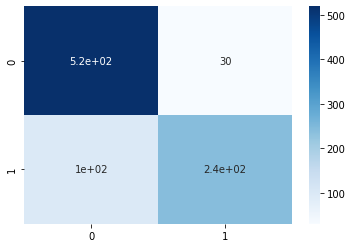

In [91]:
from sklearn.ensemble import RandomForestClassifier 

RFC = RandomForestClassifier(min_samples_split=10,max_depth=5)

RFC.fit(X_train,y_train)

eval_metric(RFC,X_train,y_train)

pred = RFC.predict(X_test)

ans = dict()

ans['PassengerId'] = list(test_.PassengerId)


lst = list()

for i in list(pred):
  lst.append(int(i))


ans['Survived'] = lst

ans_df = pd.DataFrame(ans)

print("\n\n")

print("Survived Counts in test dataset")
print(ans_df.Survived.value_counts())
print("\n\n")
ans_df.to_csv('Titanic_Predicted_RFC.csv',index=False)

In [92]:
pickle.dump(RFC, open('rf_model.pkl', 'wb'))

<h3>Gradient Boosting Classifier</h3>

Train_Set
Score on train dataset is 0.8799102132435466
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       549
         1.0       0.91      0.77      0.83       342

    accuracy                           0.88       891
   macro avg       0.89      0.86      0.87       891
weighted avg       0.88      0.88      0.88       891




Survived Counts in test dataset
0    281
1    137
Name: Survived, dtype: int64





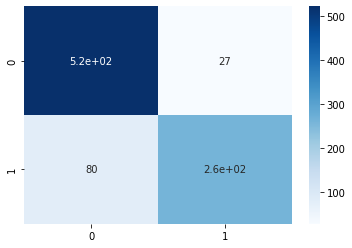

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=100, min_samples_split=10,learning_rate=0.08, random_state=0).fit(X_train, y_train)

eval_metric(GBC,X_train,y_train)

pred = GBC.predict(X_test)

ans = dict()

ans['PassengerId'] = list(test_.PassengerId)


lst = list()

for i in list(pred):
  lst.append(int(i))


ans['Survived'] = lst

ans_df = pd.DataFrame(ans)

print("\n\n")

print("Survived Counts in test dataset")
print(ans_df.Survived.value_counts())
print("\n\n")
# ans_df.to_csv('Titanic_Predicted_SVC_C_100.csv',index=False)

<p>Best Model as of Now</p>

Train_Set
Score on train dataset is 0.8900112233445566
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       549
         1.0       0.91      0.79      0.85       342

    accuracy                           0.89       891
   macro avg       0.90      0.87      0.88       891
weighted avg       0.89      0.89      0.89       891




Survived Counts in test dataset
0    282
1    136
Name: Survived, dtype: int64





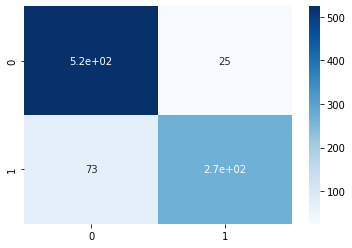

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=120, min_samples_split=14,learning_rate=0.07, random_state=42).fit(X_train, y_train)

eval_metric(GBC,X_train,y_train)

pred = GBC.predict(X_test)

ans = dict()

ans['PassengerId'] = list(test_.PassengerId)


lst = list()

for i in list(pred):
  lst.append(int(i))


ans['Survived'] = lst

ans_df = pd.DataFrame(ans)

print("\n\n")

print("Survived Counts in test dataset")
print(ans_df.Survived.value_counts())
print("\n\n")
# ans_df.to_csv('Titanic_Predicted_SVC_C_100.csv',index=False)

Train_Set
Score on train dataset is 0.9562289562289562
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       549
         1.0       0.97      0.92      0.94       342

    accuracy                           0.96       891
   macro avg       0.96      0.95      0.95       891
weighted avg       0.96      0.96      0.96       891




Survived Counts in test dataset
0    266
1    152
Name: Survived, dtype: int64





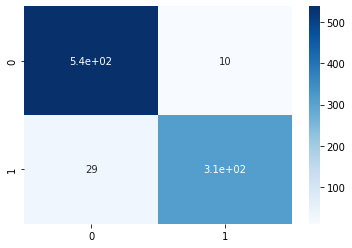

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=100, min_samples_split=10,learning_rate=0.4, random_state=42).fit(X_train, y_train)

eval_metric(GBC,X_train,y_train)

pred = GBC.predict(X_test)

ans = dict()

ans['PassengerId'] = list(test_.PassengerId)


lst = list()

for i in list(pred):
  lst.append(int(i))


ans['Survived'] = lst

ans_df = pd.DataFrame(ans)

print("\n\n")

print("Survived Counts in test dataset")
print(ans_df.Survived.value_counts())
print("\n\n")
ans_df.to_csv('Titanic_Predicted_GBC.csv',index=False)

<h3>XGBoost</h3>

Train_Set
Score on train dataset is 0.877665544332211
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90       549
         1.0       0.89      0.77      0.83       342

    accuracy                           0.88       891
   macro avg       0.88      0.86      0.87       891
weighted avg       0.88      0.88      0.88       891




Survived Counts in test dataset
0    282
1    136
Name: Survived, dtype: int64





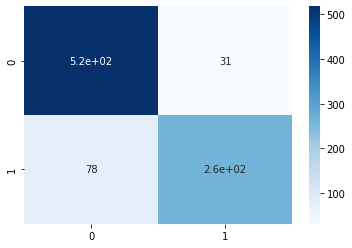

In [90]:
from xgboost import XGBClassifier


xgb_clf = XGBClassifier(n_estimators = 100, learning_rate=0.09).fit(X_train, y_train)

eval_metric(xgb_clf,X_train,y_train)

pred = xgb_clf.predict(X_test)

ans = dict()

ans['PassengerId'] = list(test_.PassengerId)


lst = list()

for i in list(pred):
  lst.append(int(i))


ans['Survived'] = lst

ans_df = pd.DataFrame(ans)

print("\n\n")

print("Survived Counts in test dataset")
print(ans_df.Survived.value_counts())
print("\n\n")
ans_df.to_csv('Titanic_Predicted_XGB.csv',index=False)